In [1]:
import pandas as pd
import numpy as np

In [2]:

url = "https://www.sharkattackfile.net/spreadsheets/GSAF5.xls"
df = pd.read_excel(url)

In [3]:
df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,11th October,2025.0,Unprovoked,Australia,Queensland,Cook Esplanade Thursday Island,Fishing/swimming,Samuel Nai,M,14,...,Tiger or Bull shark,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7th October,2025.0,Unprovoked,Australia,South Australia,Kangaroo Island,Surfing,Lee Berryman,M,50+,...,Bronze whaler?,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29th September,2025.0,Unprovoked,USA,Off California,Catalina Island,Swimming,Christopher Murray,M,54,...,unknown 1.2m shark,Todd Smith: Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27th September,2025.0,Provoked,Costa Rica,NaN,Cocos Islands,Diving-Tagging sharks,Dr. Mauricio Hoyos,M,48,...,Tiger shark 4m,Todd Smith: Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6th September,2025.0,Unprovoked,Australia,NSW,Long Reef Sydney,Surfing,Mercury Psillaskis,M,57,...,Great White Shark,Todd Smith: Andy Currie: Simon De Marchi: Kevi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            7049 non-null   object 
 1   Year            7047 non-null   float64
 2   Type            7031 non-null   object 
 3   Country         6999 non-null   object 
 4   State           6563 non-null   object 
 5   Location        6482 non-null   object 
 6   Activity        6464 non-null   object 
 7   Name            6830 non-null   object 
 8   Sex             6470 non-null   object 
 9   Age             4055 non-null   object 
 10  Injury          7014 non-null   object 
 11  Fatal Y/N       6488 non-null   object 
 12  Time            3523 non-null   object 
 13  Species         3918 non-null   object 
 14  Source          7029 non-null   object 
 15  pdf             6799 non-null   object 
 16  href formula    6794 non-null   object 
 17  href            6796 non-null   o

In [5]:
df.shape

(7049, 23)

In [6]:
df.columns

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')

In [7]:
columnas_eliminadas = ['State', 'Location', 'Name', 'Injury', 'Time', 'Year','Source','pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23', 'Case Number', 'Unnamed: 21']

for col in columnas_eliminadas:
    if col in df.columns:
        df.drop(col, axis=1, inplace=True)

print("Columnas eliminadas.")

Columnas eliminadas.


In [8]:
df = df.drop_duplicates()
print("Duplicados eliminados. Filas restantes:", df.shape[0])

Duplicados eliminados. Filas restantes: 7021


In [9]:
df = df.dropna(how="all")
print("Filas completamente vacías eliminadas.")

Filas completamente vacías eliminadas.


In [10]:
df.head()

,Date,Type,Country,Activity,Sex,Age,Fatal Y/N,Species
0,11th October,Unprovoked,Australia,Fishing/swimming,M,14,N,Tiger or Bull shark
1,7th October,Unprovoked,Australia,Surfing,M,50+,N,Bronze whaler?
2,29th September,Unprovoked,USA,Swimming,M,54,N,unknown 1.2m shark
3,27th September,Provoked,Costa Rica,Diving-Tagging sharks,M,48,N,Tiger shark 4m
4,6th September,Unprovoked,Australia,Surfing,M,57,Y,Great White Shark


In [11]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '_')

In [12]:
if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'], errors='coerce')

C:\Users\delam\AppData\Local\Temp\ipykernel_25524\1668207057.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [13]:
df['date'].head()


0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: date, dtype: datetime64[ns]

In [14]:
print(df['date'].isnull().sum())

895


In [15]:
median_date = df['date'].median()
df['date'] = df['date'].fillna(median_date)

In [16]:
print(df['date'].isnull().sum())

0


In [17]:
df['date'] = df['date'].dt.date

In [18]:
print(df['date'].head())

0    1992-08-17
1    1992-08-17
2    1992-08-17
3    1992-08-17
4    1992-08-17
Name: date, dtype: object


Hasta aquí el formato fechas acabado.

In [19]:
df['type'] = df['type'].astype(str).str.strip().str.lower()

In [20]:
df['type'].value_counts(dropna=False)

type
unprovoked             5181
provoked                638
invalid                 552
watercraft              354
sea disaster            241
questionable             26
nan                      18
boat                      7
unconfirmed               1
?                         1
unverified                1
under investigation       1
Name: count, dtype: int64

In [21]:
mapeo_type = {
    'unprovoked': 'unprovoked',
    'provoked': 'provoked',
    'boat': 'non-attack',
    'sea disaster': 'non-attack',
    'post-mortem bite': 'non-attack',
    'invalid': 'invalid',
    'questionable': 'questionable',
    'probable': 'questionable',
    'unconfirmed': 'questionable',
    'unconfirmed incident': 'questionable',
    'unconfirmed attack': 'questionable',
    'under investigation': 'questionable',
    'unknown': 'unknown',
    'nan': 'unknown',
    'none': 'unknown',
    'other': 'unknown'
}

In [22]:
df['type'] = df['type'].map(mapeo_type).fillna('unknown')
df['type'] = df['type'].astype('category')

In [23]:
df['type'].value_counts(dropna=False)

type
unprovoked      5181
provoked         638
invalid          552
unknown          374
non-attack       248
questionable      28
Name: count, dtype: int64

In [24]:
print(df['type'].isnull().sum())

0


Hasta aquí formato type acabado.

tengo que hacer valores unicos y hacerlo de mayor a menor.

In [25]:
top_60 = df['country'].value_counts().head(60).index.tolist()

In [26]:
df['country'] = df['country'].apply(lambda x: x if x in top_60 else 'other')

In [27]:
df['country'] = df['country'].astype(str).str.lower().str.strip()
df['country'] = df['country'].astype('category')

In [28]:
print(df['country'].value_counts(dropna=False))

country
usa                     2564
australia               1506
south africa             596
other                    481
new zealand              143
bahamas                  136
papua new guinea         135
brazil                   121
mexico                   103
italy                     72
fiji                      67
new caledonia             65
philippines               63
reunion                   60
cuba                      48
egypt                     48
spain                     46
mozambique                46
india                     40
french polynesia          37
japan                     36
croatia                   35
panama                    32
solomon islands           30
jamaica                   30
iran                      26
england                   25
greece                    24
indonesia                 24
hong kong                 24
costa rica                18
atlantic ocean            17
pacific ocean             17
bermuda                   16
vietna

In [29]:
top_10 = df.loc[df['country'] != 'other', 'country'].value_counts().head(10).index.tolist()

In [30]:
df['country'] = df['country'].apply(lambda x: 'unknown' if x == 'other'
                                    else x if x in top_10
                                    else 'rest of the world')

In [31]:
df['country'] = df['country'].astype('category')

In [32]:
df['country'] = df['country'].astype('category')

In [33]:
print(df['country'].value_counts(dropna=False))


country
usa                  2564
australia            1506
rest of the world    1097
south africa          596
unknown               481
new zealand           143
bahamas               136
papua new guinea      135
brazil                121
mexico                103
italy                  72
fiji                   67
Name: count, dtype: int64


In [34]:
print(df['country'].isnull().sum())

0


Hasta aquí tenemos ya country.

In [35]:
df['sex'] = df['sex'].astype(str).str.upper().str.strip()

In [36]:
df['sex'].value_counts(dropna=False)

sex
M        5634
F         804
NAN       578
N           2
LLI         1
M X 2       1
.           1
Name: count, dtype: int64

In [37]:
def clean_sex(x):
    if x == 'M':
        return 'Male'
    elif x == 'F':
        return 'Female'
    else:
        return 'Unknown'

df['sex'] = df['sex'].apply(clean_sex)

In [38]:
df['sex'] = df['sex'].astype('category')

In [39]:
print(df['sex'].value_counts())

sex
Male       5634
Female      804
Unknown     583
Name: count, dtype: int64


Hasta aquí sex.

In [40]:
df['activity'] = df['activity'].str.lower().str.strip()

In [41]:
# Crea la columna de grupo, inicialmente vacía (NaN)
df['activity_group'] = pd.NA

# 1. Agrupación por palabras clave (usa regex=True por defecto con .str.contains)
df.loc[df['activity'].str.contains('surf|paddle|board|wake', na=False), 'activity_group'] = 'surfing'
df.loc[df['activity'].str.contains('swim|bathing|snorkeling', na=False), 'activity_group'] = 'swimming'
df.loc[df['activity'].str.contains('fish|hook|net|trawling|spear', na=False), 'activity_group'] = 'fishing'
df.loc[df['activity'].str.contains('wade|standing|splashing', na=False), 'activity_group'] = 'wading'
df.loc[df['activity'].str.contains('diving|dive', na=False), 'activity_group'] = 'diving'
df.loc[df['activity'].str.contains('boat|kayak|canoe|vessel|pirogue|capsized', na=False), 'activity_group'] = 'boating/vessel'
df.loc[df['activity'].str.contains('floating|treading|drowning', na=False), 'activity_group'] = 'floating/treading'
df.loc[df['activity'].str.contains('walking|playing|clamming|dangling', na=False), 'activity_group'] = 'shore/shallow water'
df.loc[df['activity'].str.contains('disaster|shipwreck|fell|jumped|run down|sailing|rowing', na=False), 'activity_group'] = 'disaster/accident'
df.loc[df['activity'].str.contains('feeding', na=False), 'activity_group'] = 'feeding/provoked'

# 2. Manejo de Otros/Residuales
# Asigna 'Other' (Otro) a todas las filas que aún no han sido clasificadas.
df['activity_group'] = df['activity_group'].fillna('Other')

In [42]:
df['activity_group'].value_counts()

activity_group
surfing                1559
swimming               1509
fishing                1204
Other                  1198
diving                  635
boating/vessel          294
disaster/accident       235
wading                  179
floating/treading       111
shore/shallow water      71
feeding/provoked         26
Name: count, dtype: int64

In [43]:
df_other = df.loc[df['activity_group'] == 'other']
print(df_other['activity'].value_counts().head(20))

Series([], Name: count, dtype: int64)


In [44]:
df['fatal_y/n'].value_counts()

fatal_y/n
N          4894
Y          1475
UNKNOWN      70
 N            7
F             5
M             3
Nq            1
n             1
2017          1
Y x 2         1
N             1
y             1
Name: count, dtype: int64

In [45]:
mapeo_fatal = {
    
    'N': 'N',
    'n': 'N',
    'Nq': 'N',  
    'F': 'N',   
    'M': 'N',   
    '2017': 'N',     
    'Y': 'Y',
    'y': 'Y',   
    'UNKNOWN': 'UNKNOWN'
}


df['fatal_y/n'] = df['fatal_y/n'].replace(mapeo_fatal)


df['fatal_y/n'] = df['fatal_y/n'].fillna('UNKNOWN')


valores_validos = ['Y', 'N', 'UNKNOWN']
df.loc[~df['fatal_y/n'].isin(valores_validos), 'fatal_y/n'] = 'UNKNOWN'



df['fatal_y/n'] = df['fatal_y/n'].astype('category')

In [46]:
df['fatal_y/n'].value_counts()

fatal_y/n
N          4904
Y          1476
UNKNOWN     641
Name: count, dtype: int64

In [47]:
df.head(10)


,date,type,country,activity,sex,age,fatal_y/n,species,activity_group
0,1992-08-17,unprovoked,australia,fishing/swimming,Male,14,N,Tiger or Bull shark,fishing
1,1992-08-17,unprovoked,australia,surfing,Male,50+,N,Bronze whaler?,surfing
2,1992-08-17,unprovoked,usa,swimming,Male,54,N,unknown 1.2m shark,swimming
3,1992-08-17,provoked,unknown,diving-tagging sharks,Male,48,N,Tiger shark 4m,diving
4,1992-08-17,unprovoked,australia,surfing,Male,57,Y,Great White Shark,surfing
5,1992-08-17,unprovoked,usa,snorkeling,Male,8,N,Not stated,swimming
6,1992-08-17,unprovoked,usa,swimming,Female,8,N,Not stated,swimming
7,1992-08-17,unprovoked,australia,surfing,Male,?,N,5m (16.5ft) Great White,surfing
8,1992-08-17,unprovoked,unknown,spearfishing,Male,63,N,Undetermined,fishing
9,1992-08-17,provoked,usa,fishing,Male,?,N,Lemon shark 1.8 m (6ft),fishing


In [48]:
df['date'].nunique()

5139

In [49]:
df_fatal = df.groupby(['country', 'fatal_y/n']).size().unstack(fill_value=0)

C:\Users\delam\AppData\Local\Temp\ipykernel_25524\900708983.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_fatal = df.groupby(['country', 'fatal_y/n']).size().unstack(fill_value=0)


In [50]:
df_fatal # relación de fatalidad por países

fatal_y/n,N,UNKNOWN,Y
country,,,
australia,1053,147,306
bahamas,113,8,15
brazil,71,11,39
fiji,44,1,22
italy,41,17,14
mexico,44,11,48
new zealand,105,13,25
papua new guinea,72,5,58
rest of the world,564,99,434


In [51]:
df_sexo = df.groupby(['sex', 'type']).size().unstack(fill_value=0)

C:\Users\delam\AppData\Local\Temp\ipykernel_25524\299431288.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sexo = df.groupby(['sex', 'type']).size().unstack(fill_value=0)


In [52]:
df_sexo  # relación entre sexo y tipo de ataque

type,invalid,non-attack,provoked,questionable,unknown,unprovoked
sex,,,,,,
Female,65,9,31,5,13,681
Male,413,165,547,21,157,4331
Unknown,74,74,60,2,204,169


In [62]:
df_fatalidad_por_actividad = df.groupby(['activity_group', 'fatal_y/n']).size().unstack(fill_value=0)

df_fatalidad_por_actividad.columns.name = None
df_fatalidad_por_actividad.columns = ['No Fatal (N)', 'Fatal (Y)', 'Unknown']

C:\Users\delam\AppData\Local\Temp\ipykernel_25524\1153403288.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_fatalidad_por_actividad = df.groupby(['activity_group', 'fatal_y/n']).size().unstack(fill_value=0)


In [63]:
df_fatalidad_por_actividad['Total'] = df_fatalidad_por_actividad['No Fatal (N)'] + df_fatalidad_por_actividad['Fatal (Y)']

In [64]:
df_fatalidad_por_actividad['Tasa Fatalidad (%)'] = (df_fatalidad_por_actividad['Fatal (Y)'] / df_fatalidad_por_actividad['Total']) * 100
df_fatalidad_por_actividad['Tasa Fatalidad (%)'] = df_fatalidad_por_actividad['Tasa Fatalidad (%)'].round(2)
df_fatalidad_por_actividad = df_fatalidad_por_actividad.sort_values(by='Tasa Fatalidad (%)', ascending=False)

In [65]:
df_clean = df_fatalidad_por_actividad.drop(columns=['Unknown'])
df_clean = df_fatalidad_por_actividad.drop('Unknown', axis=1)
df_clean

,No Fatal (N),Fatal (Y),Total,Tasa Fatalidad (%)
activity_group,,,,
Other,694,232,926,25.05
disaster/accident,83,24,107,22.43
boating/vessel,154,37,191,19.37
diving,411,72,483,14.91
swimming,874,134,1008,13.29
floating/treading,81,6,87,6.90
fishing,992,67,1059,6.33
shore/shallow water,62,4,66,6.06
surfing,1377,61,1438,4.24


In [72]:
df_fatalidad_por_pais = df.groupby(['country', 'fatal_y/n']).size().unstack(fill_value=0)

df_fatalidad_por_pais.columns.name = None
df_fatalidad_por_pais.columns = ['No Fatal (N)', 'Fatal (Y)', 'Unknown']

C:\Users\delam\AppData\Local\Temp\ipykernel_25524\733961417.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_fatalidad_por_pais = df.groupby(['country', 'fatal_y/n']).size().unstack(fill_value=0)


In [73]:
df_fatalidad_por_pais['Total'] = df_fatalidad_por_pais['No Fatal (N)'] + df_fatalidad_por_pais['Fatal (Y)']

In [74]:
df_fatalidad_por_pais['Tasa Fatalidad (%)'] = (df_fatalidad_por_pais['Fatal (Y)'] / df_fatalidad_por_pais['Total']) * 100
df_fatalidad_por_pais['Tasa Fatalidad (%)'] = df_fatalidad_por_pais['Tasa Fatalidad (%)'].round(2)
df_fatalidad_por_pais = df_fatalidad_por_pais.sort_values(by='Tasa Fatalidad (%)', ascending=False)

In [76]:
df_clean_1 = df_fatalidad_por_pais.drop(columns=['Unknown'])
df_clean_1 = df_fatalidad_por_pais.drop('Unknown', axis=1)
df_clean_1

,No Fatal (N),Fatal (Y),Total,Tasa Fatalidad (%)
country,,,,
italy,41,17,58,29.31
mexico,44,11,55,20.00
unknown,220,53,273,19.41
rest of the world,564,99,663,14.93
south africa,421,66,487,13.55
brazil,71,11,82,13.41
australia,1053,147,1200,12.25
new zealand,105,13,118,11.02
usa,2156,210,2366,8.88


In [79]:
df_actividad_por_pais = df.groupby(['country', 'activity_group']).size().unstack(fill_value=0)

df_actividad_por_pais

C:\Users\delam\AppData\Local\Temp\ipykernel_25524\1090916488.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_actividad_por_pais = df.groupby(['country', 'activity_group']).size().unstack(fill_value=0)


activity_group,Other,boating/vessel,disaster/accident,diving,feeding/provoked,fishing,floating/treading,shore/shallow water,surfing,swimming,wading
country,,,,,,,,,,,
australia,218,52,56,174,10,287,17,5,329,332,26
bahamas,18,5,6,24,1,53,3,1,3,19,3
brazil,20,2,2,2,0,9,1,1,44,40,0
fiji,14,4,1,13,0,23,1,1,3,6,1
italy,14,13,2,10,0,18,0,1,1,13,0
mexico,18,5,1,19,0,11,1,0,10,38,0
new zealand,17,13,3,9,0,34,2,0,24,36,5
papua new guinea,35,8,4,12,1,54,0,0,1,16,4
rest of the world,253,62,64,90,4,199,8,8,87,306,16


C:\Users\delam\AppData\Local\Temp\ipykernel_25524\3182045660.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




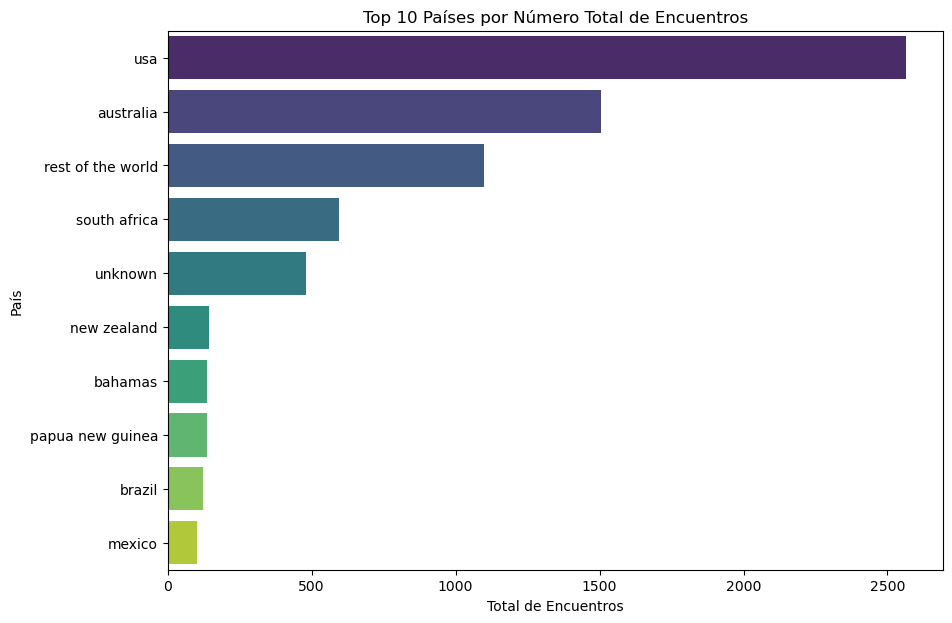

In [ ]:
plt.figure(figsize=(10, 7))
sns.countplot(
    y='country',  
    data=df_top_10,
    order=top_10_countries, 
    palette='viridis'
)
plt.title('Top 10 Países por Número Total de Encuentros')
plt.xlabel('Total de Encuentros')
plt.ylabel('País')
plt.show()

C:\Users\delam\AppData\Local\Temp\ipykernel_25524\1008285568.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




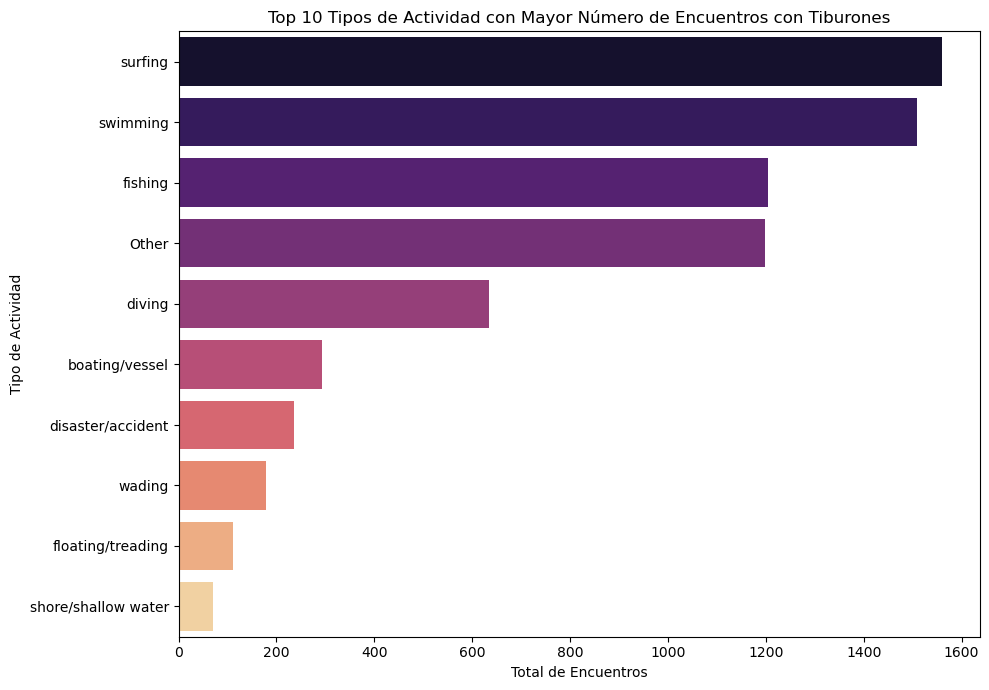

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calcular las 10 categorías de actividad con más registros
top_10_activities = df['activity_group'].value_counts().nlargest(10).index

# 2. Filtrar el DataFrame original para incluir solo esas actividades
# Esto es necesario para que el countplot solo cuente las categorías que nos interesan
df_top_10_activities = df[df['activity_group'].isin(top_10_activities)]

# 3. Crear el gráfico de barras horizontal ordenado
plt.figure(figsize=(10, 7))
sns.countplot(
    y='activity_group',  # Usar 'y' para barras horizontales
    data=df_top_10_activities,
    order=top_10_activities,  # Ordena las barras de mayor a menor frecuencia
    palette='magma' # Puedes cambiar la paleta de colores para hacerlo más llamativo
)

plt.title('Top 10 Tipos de Actividad con Mayor Número de Encuentros con Tiburones')
plt.xlabel('Total de Encuentros')
plt.ylabel('Tipo de Actividad')

# Ajustes finales para que el gráfico se vea bien
plt.tight_layout()
plt.show()

C:\Users\delam\AppData\Local\Temp\ipykernel_25524\1055773753.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




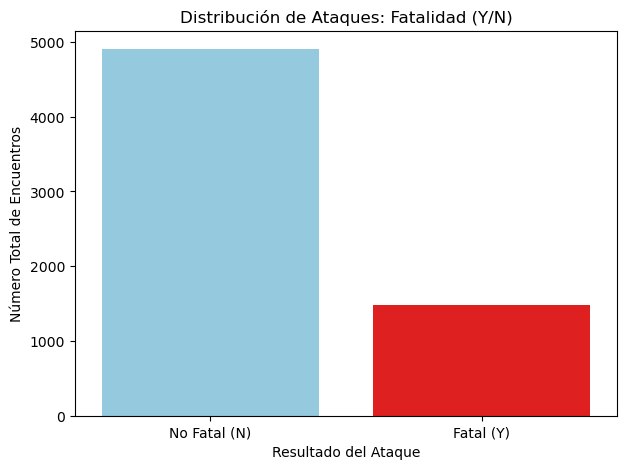

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
sns.countplot(
    x='fatal_y/n',
    data=df,
    order=['N', 'Y'],  # Establece un orden lógico (No Fatal primero, luego Fatal)
    palette={'N': 'skyblue', 'Y': 'red'}  # Asigna colores para mayor impacto
)

plt.title('Distribución de Ataques: Fatalidad (Y/N)')
plt.xlabel('Resultado del Ataque')
plt.ylabel('Número Total de Encuentros')
plt.xticks(ticks=[0, 1], labels=['No Fatal (N)', 'Fatal (Y)']) # Asegura buenas etiquetas si hay 'Unknown'
plt.show()